In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
# Parameters of the Axelrod model
grid_size = 32  # size of the grid
F = 3  # number of features
q = 10  # number of traits per feature

# Parameter for the noise
noise = 0.01  # probability of random cultural drift

# Parameter for the mass media influence
media = 0.01  # probability of adopting the global culture

In [3]:
# Initialize the culture grid
culture_grid = np.random.randint(q, size=(grid_size, grid_size, F))

In [4]:
def simulation_step():
    # Randomly select an agent
    x, y = np.random.randint(grid_size, size=2)

    # Randomly select a neighbor
    dx, dy = np.random.choice([-1, 0, 1], size=2)
    nx, ny = (x + dx) % grid_size, (y + dy) % grid_size  # periodic boundary conditions

    # If they share at least one cultural feature
    if any(culture_grid[x, y, :] == culture_grid[nx, ny, :]):
        # The agent adopts one differing feature from the neighbor
        differing_features = np.where(culture_grid[x, y, :] != culture_grid[nx, ny, :])[0]
        if len(differing_features) > 0:
            f = np.random.choice(differing_features)
            culture_grid[x, y, f] = culture_grid[nx, ny, f]

def simulation_step_with_noise():
    # Perform a normal simulation step
    simulation_step()

    # With a small probability, an agent randomly changes one of its features
    if np.random.rand() < noise:
        x, y = np.random.randint(grid_size, size=2)
        f = np.random.randint(F)
        culture_grid[x, y, f] = np.random.randint(q)

def calculate_global_culture(culture_grid):
    L, _, F = culture_grid.shape
    culture_int = np.sum(culture_grid * (q ** np.arange(F)), axis=2)
    unique_vals, counts = np.unique(culture_int, return_counts=True)
    most_common_culture_int = unique_vals[np.argmax(counts)]
    most_common_culture = np.zeros(F)
    for i in range(F-1, -1, -1):
        most_common_culture[i] = most_common_culture_int % q
        most_common_culture_int //= q
    return most_common_culture

# The global culture
global_culture = calculate_global_culture(culture_grid)

def simulation_step_with_noise_and_media():
    # Perform a simulation step with noise
    simulation_step_with_noise()

    # With a small probability, an agent adopts the global culture
    if np.random.rand() < media:
        x, y = np.random.randint(grid_size, size=2)
        culture_grid[x, y, :] = global_culture

def calculate_Smax_norm():
    L, _, F = culture_grid.shape
    culture_int = np.sum(culture_grid * (q ** np.arange(F)), axis=2)
    unique_vals, counts = np.unique(culture_int, return_counts=True)
    max_count = np.max(counts)
    Smax_norm = max_count / (L ** 2)
    return Smax_norm

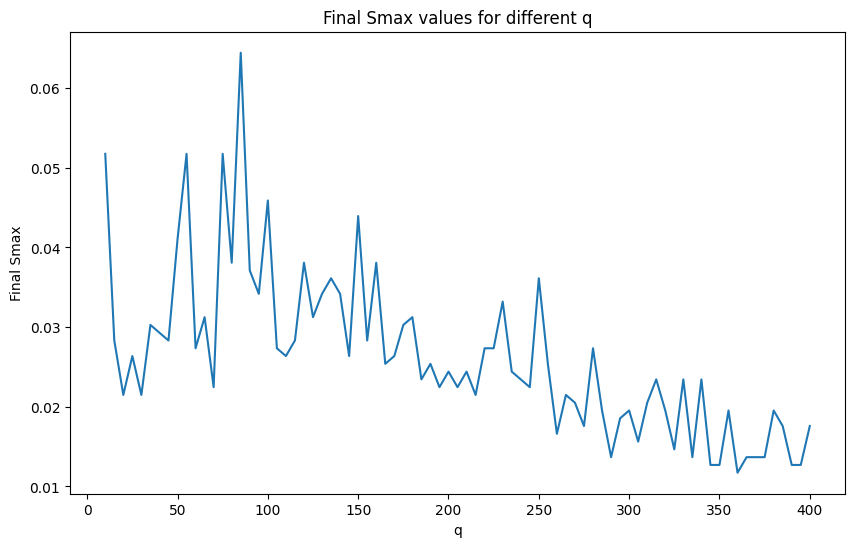

In [5]:
# Initialize a list to store final Smax values for each q
final_smax_values = []
q_values = range(10, 401, 5)

for q in q_values:
    # Initialize the culture grid
    culture_grid = np.random.randint(q, size=(grid_size, grid_size, F))
    smax_values = []

    # Run the simulation with noise and mass media influence for a certain number of steps
    for _ in range(5000000):
        simulation_step_with_noise()
        smax = calculate_Smax_norm()
        smax_values.append(smax)

    # Store the final Smax value for this q
    final_smax_values.append(smax_values[-1])

# Plot final Smax values vs q
plt.figure(figsize=(10, 6))
plt.plot(q_values, final_smax_values)
plt.xlabel('q')
plt.ylabel('Final Smax')
plt.title('Final Smax values for different q')
plt.show()
